In [126]:
import numpy as np
np.set_printoptions(precision=2)
np.set_printoptions(suppress=True)
from pprint import pprint
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
%matplotlib inline

### 載入digits資料集

In [127]:
from sklearn.datasets import load_digits
digits = load_digits()
X = digits.data
y = digits.target

In [116]:
Xdataset=[]
for i in range(len(X)):
    arr=[]
    for j in range(64):
        if X[i][j]!=0:
            arr.append(1)
        else:
            arr.append(0) 
    Xdataset.append(arr)
X=np.array(Xdataset)

### 使用t-SNE做降維，sklearn t-SNE中較重要的參數:
- n_components: 降維之後的維度
- perpexity: 最佳化過程中考慮鄰近點的多寡，default 30，原始paper建議5-50
- n_iter: 迭代次數，預設1000

In [3]:
tsne = TSNE(n_components=2, random_state=42,n_iter=5000)
X_reduced = tsne.fit_transform(X)


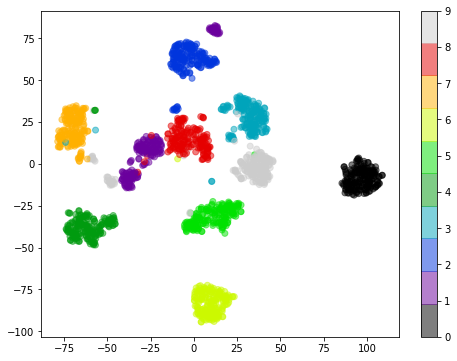

In [4]:
plt.figure(figsize=(8,6))
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y, alpha=0.5,
            cmap=plt.cm.get_cmap('nipy_spectral', 10))

plt.colorbar()
plt.show()

## XGboost learn model

In [2]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, X_reduced, test_size = 0.3, random_state=100)

NameError: name 'X' is not defined

In [1]:
import xgboost as xgb
from sklearn.multioutput import MultiOutputRegressor
# fitting
# multioutputregressor = MultiOutputRegressor(xgb.XGBRegressor(objective='reg:linear')).fit(X_train, y_train)



NameError: name 'X_train' is not defined

In [28]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor()
regr = MultiOutputRegressor(knn)
 
regr.fit(X_train, y_train)


MultiOutputRegressor(estimator=KNeighborsRegressor(algorithm='auto',
                                                   leaf_size=30,
                                                   metric='minkowski',
                                                   metric_params=None,
                                                   n_jobs=None, n_neighbors=5,
                                                   p=2, weights='uniform'),
                     n_jobs=None)

In [20]:
# predicting
# pred=multioutputregressor.predict(X_test)
pred=regr.predict(X_train)

In [21]:
print(pred)

[[-67.13  24.92]
 [100.4   -4.72]
 [-62.18 -33.74]
 ...
 [100.35 -13.38]
 [ 18.16 -86.47]
 [  6.02   6.97]]


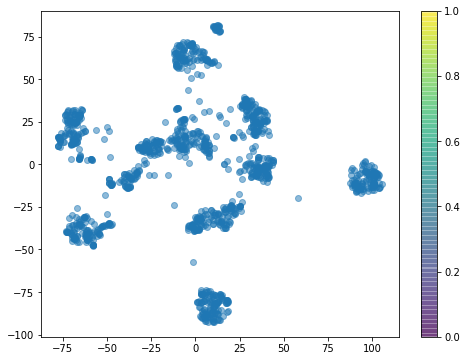

In [26]:
plt.figure(figsize=(8,6))
plt.scatter(pred[:, 0], pred[:, 1], alpha=0.5,
            cmap=plt.cm.get_cmap('nipy_spectral', 10))

plt.colorbar()
plt.show()

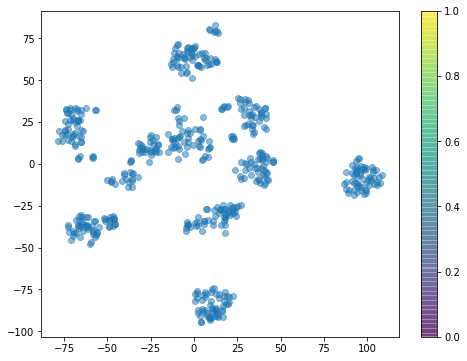

In [24]:
plt.figure(figsize=(8,6))
plt.scatter(y_test[:, 0], y_test[:, 1], alpha=0.5,
            cmap=plt.cm.get_cmap('nipy_spectral', 10))

plt.colorbar()
plt.show()

In [130]:
import cv2
image = cv2.imread("./2.png")[:,:,::-1]
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
image=image.reshape(64)/16

In [105]:
img_pred=regr.predict([image])

In [106]:
img_pred

array([[-19.79,  13.41]], dtype=float32)

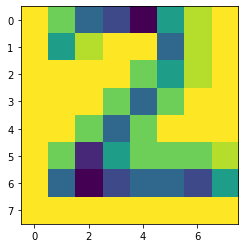

In [133]:
plt.imshow(image.reshape(8,8))

In [132]:
arr=[]
for i in range(64):
    if X[0][i]!=0:
        arr.append(1)
    else:
        arr.append(0) 
arr=np.array(arr)

In [131]:
image

array([15.94, 15.81, 15.56, 15.5 , 15.38, 15.69, 15.88, 15.94, 15.94,
       15.69, 15.88, 15.94, 15.94, 15.56, 15.88, 15.94, 15.94, 15.94,
       15.94, 15.94, 15.81, 15.69, 15.88, 15.94, 15.94, 15.94, 15.94,
       15.81, 15.56, 15.81, 15.94, 15.94, 15.94, 15.94, 15.81, 15.56,
       15.81, 15.94, 15.94, 15.94, 15.94, 15.81, 15.44, 15.69, 15.81,
       15.81, 15.81, 15.88, 15.94, 15.56, 15.38, 15.5 , 15.56, 15.56,
       15.5 , 15.69, 15.94, 15.94, 15.94, 15.94, 15.94, 15.94, 15.94,
       15.94])